<a href="https://colab.research.google.com/github/Amir-Youssef/PAD-PrevDemanda/blob/main/Trabalho_PAD_Explore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabalho de PAD - Previsão de Demanda

###Carregando o arquivo direto do drive

In [1]:
!pip install requests
!pip install gdown

In [2]:
from zipfile import ZipFile
import pandas as pd
import requests
import gdown

In [ ]:
url = f'https://drive.google.com/uc?id=1tiJYH2tPY_I7lZlN03jPgNzeekRdOVqf'

output = 'df_completo.csv'

gdown.download(url, output, quiet=False)

encoding = 'UTF-8'

df_completo = pd.read_csv(output, encoding=encoding)
df_completo

###Padronizando dataset

In [4]:
pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 3.4 MB/s eta 0:00:00


In [5]:
import pandas as pd
from unidecode import unidecode

def remover_acentos(texto):
    if isinstance(texto, str):
        texto_sem_acentos = unidecode(texto)
        texto_sem_acentos_e_cedilha = texto_sem_acentos.replace('ç', 'c').replace('Ç', 'C')
        return texto_sem_acentos_e_cedilha
    else:
        return texto

colunas_relevantes = ['nome_curso_superior']
for coluna in colunas_relevantes:
    df_completo[coluna] = df_completo[coluna].apply(remover_acentos)

In [ ]:
util = ['nome_curso_superior', 'data_de_ingresso_no_curso', 'data_de_conclusao_do_curso']

df_completo = df_completo[util]

df_completo.rename(columns={'nome_curso_superior': 'curso', 'data_de_ingresso_no_curso' : 'entrada', 'data_de_conclusao_do_curso' : 'conclusao' }, inplace=True)

##Fazendo a Análise Exploratória dos Dados

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

In [ ]:
curso = df_completo[df_completo['curso'] == 'DIREITO']
print(curso)

         curso     entrada   conclusao
29     DIREITO  2015-01-01  2021-01-28
40     DIREITO  2018-01-01  2023-04-28
765    DIREITO  2013-01-01  2019-08-05
769    DIREITO  2012-01-01  2019-08-05
851    DIREITO  2013-01-01  2019-08-23
...        ...         ...         ...
31379  DIREITO  2015-06-01  2021-12-21
31380  DIREITO  2015-06-01  2021-12-21
31381  DIREITO  2011-01-01  2021-12-21
31382  DIREITO  2016-01-01  2021-12-21
31383  DIREITO  2016-01-01  2021-12-21

[1956 rows x 3 columns]


In [8]:
lista_cursos = df_completo['curso'].unique().tolist()
lista_cursos = sorted(lista_cursos)
print(len(lista_cursos))
for curso in lista_cursos:
    print(curso)

78
ADMINISTRACAO
AGRONOMIA
ARQUITETURA E URBANISMO
ARTES CENICAS
ARTES VISUAIS
BIBLIOTECONOMIA
BIOMEDICINA
BIOTECNOLOGIA
CIENCIA DA COMPUTACAO
CIENCIAS AMBIENTAIS
CIENCIAS BIOLOGICAS
CIENCIAS CONTABEIS
CIENCIAS DA COMPUTACAO
CIENCIAS ECONOMICAS
CIENCIAS SOCIAIS
COMUNICACAO SOCIAL
DANCA
DESIGN DE AMBIENTES
DESIGN DE MODA
DESIGN GRAFICO
DIRECAO DE ARTE
DIREITO
ECOLOGIA E ANALISE AMBIENTAL
EDUCACAO DO CAMPO
EDUCACAO FISICA
EDUCACAO INTERCULTURAL
ENFERMAGEM
ENGENHARIA AMBIENTAL E SANITARIA
ENGENHARIA CIVIL
ENGENHARIA DA COMPUTACAO
ENGENHARIA DE ALIMENTOS
ENGENHARIA DE MINAS
ENGENHARIA DE PRODUCAO
ENGENHARIA DE SOFTWARE
ENGENHARIA DE TRANSPORTES
ENGENHARIA ELETRICA
ENGENHARIA FISICA
ENGENHARIA FLORESTAL
ENGENHARIA MECANICA
ENGENHARIA QUIMICA
ESTATISTICA
FARMACIA
FILOSOFIA
FISICA
FISICA MEDICA
FISIOTERAPIA
GEOGRAFIA
GEOLOGIA
GESTAO DA INFORMACAO
HISTORIA
JORNALISMO
LETRAS
LETRAS: ESPANHOL
LETRAS: ESTUDOS LITERARIOS
LETRAS: FRANCES
LETRAS: INGLES
LETRAS: LIBRAS
LETRAS: LINGUISTICA
LETRAS: POR

In [9]:
formados_por_curso = df_completo['curso'].value_counts()
formados_por_curso


DIREITO                       1956
PEDAGOGIA                     1404
MEDICINA                      1350
AGRONOMIA                     1239
MEDICINA VETERINARIA          1041
                              ... 
MUSEOLOGIA                      63
LETRAS: ESTUDOS LITERARIOS      42
LETRAS: LINGUISTICA             42
LETRAS: FRANCES                 33
MATEMATICA INDUSTRIAL           30
Name: curso, Length: 78, dtype: int64

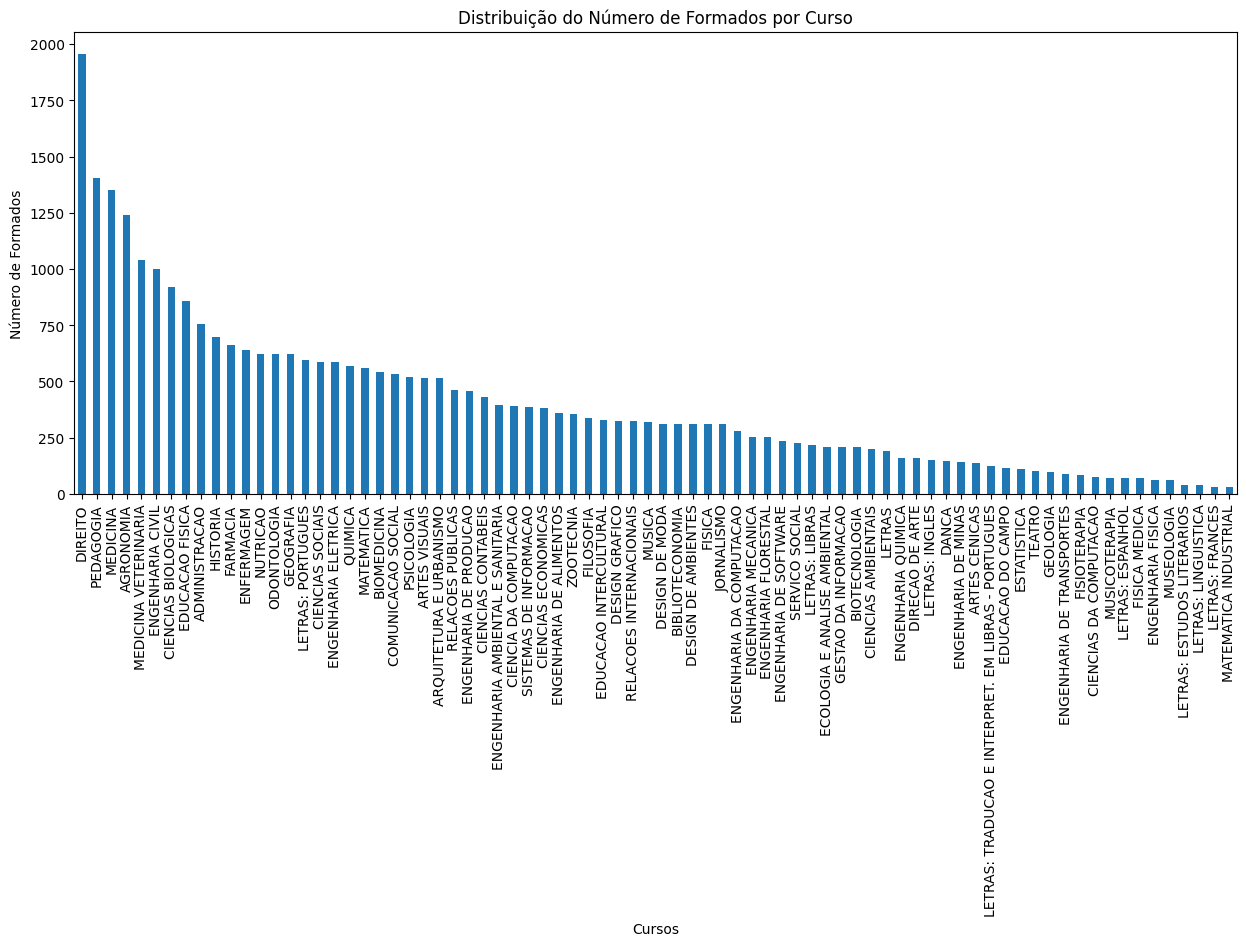

In [10]:
formados_por_curso.plot(kind='bar', figsize=(15, 6))

plt.title('Distribuição do Número de Formados por Curso')
plt.xlabel('Cursos')
plt.ylabel('Número de Formados')

plt.show()

In [11]:
warnings.filterwarnings('ignore')

df_completo['entrada'] = pd.to_datetime(df_completo['entrada'])
df_completo['conclusao'] = pd.to_datetime(df_completo['conclusao'])

df_completo['tempo_duracao'] = (df_completo['conclusao'] - df_completo['entrada']).dt.total_seconds()  / (60 * 60 * 24 * 365.25)  # Calcula em anos

tempo_medio = df_completo['tempo_duracao'].mean()
tempo_medio_por_curso = df_completo.groupby('curso')['tempo_duracao'].mean()

dados_tabela = {
    'Curso': tempo_medio_por_curso.index,
    'Tempo Médio de Duração (Anos)': tempo_medio_por_curso.values
}

tabela_final = pd.DataFrame(dados_tabela)
print(tempo_medio)
print(tabela_final)

5.8779419978189
                      Curso  Tempo Médio de Duração (Anos)
0             ADMINISTRACAO                       6.316059
1                 AGRONOMIA                       6.762704
2   ARQUITETURA E URBANISMO                       6.053213
3             ARTES CENICAS                       6.831652
4             ARTES VISUAIS                       5.531461
..                      ...                            ...
73        RELACOES PUBLICAS                       5.039779
74           SERVICO SOCIAL                       5.595948
75   SISTEMAS DE INFORMACAO                       7.210183
76                   TEATRO                       5.058662
77                ZOOTECNIA                       6.438827

[78 rows x 2 columns]


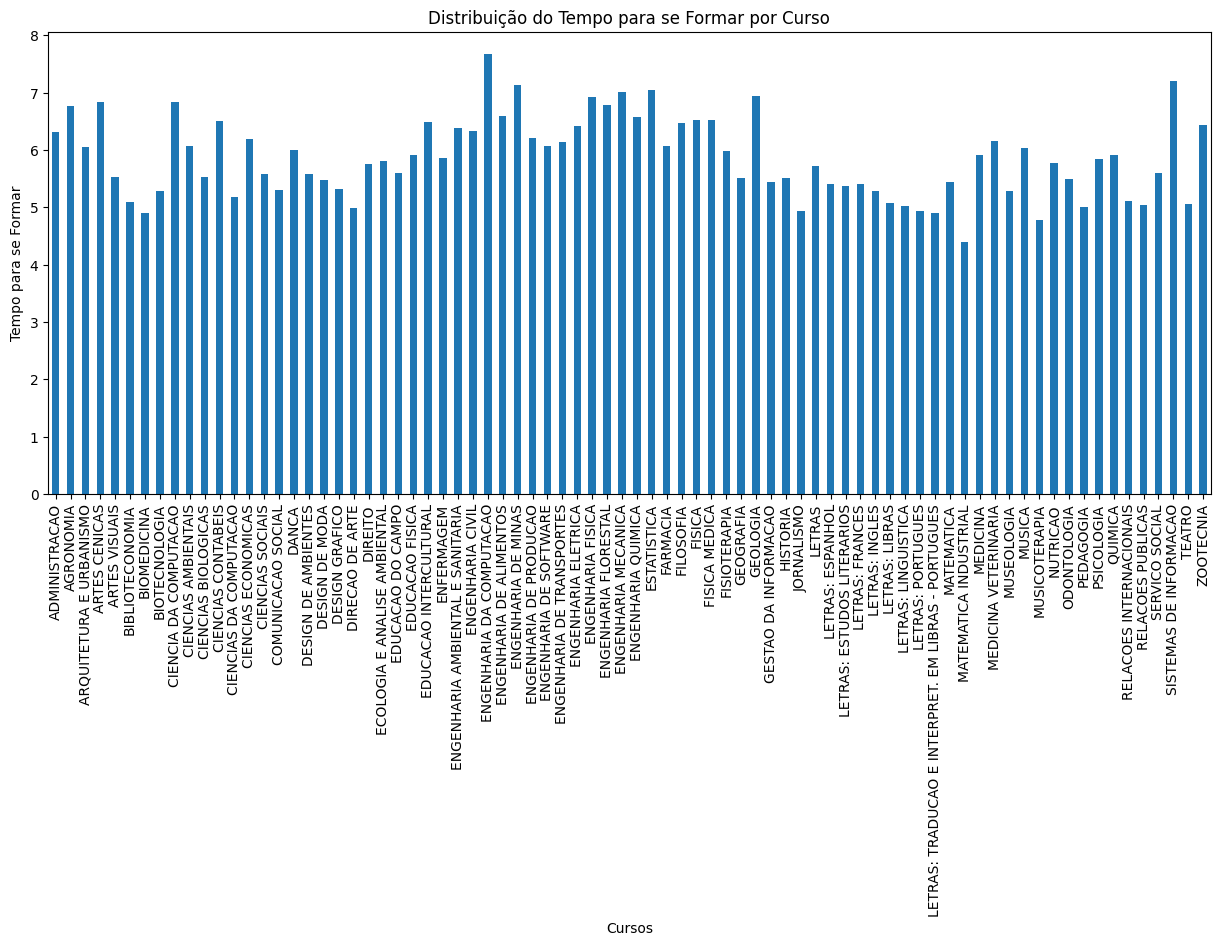

In [12]:
tempo_medio_por_curso.plot(kind='bar', figsize=(15, 6))

plt.title('Distribuição do Tempo para se Formar por Curso')
plt.xlabel('Cursos')
plt.ylabel('Tempo para se Formar')

plt.show()

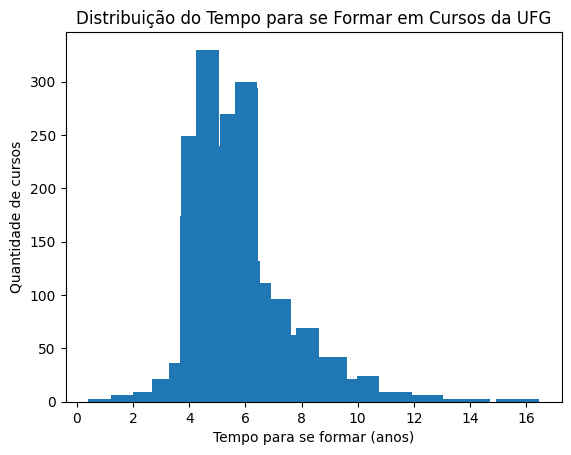

In [13]:
distribuicao_cursos = df_completo.groupby('tempo_duracao').size()

distribuicao_cursos = distribuicao_cursos.sort_index()

plt.bar(distribuicao_cursos.index, distribuicao_cursos.values)
plt.xlabel('Tempo para se formar (anos)')
plt.ylabel('Quantidade de cursos')
plt.title('Distribuição do Tempo para se Formar em Cursos da UFG')
plt.show()

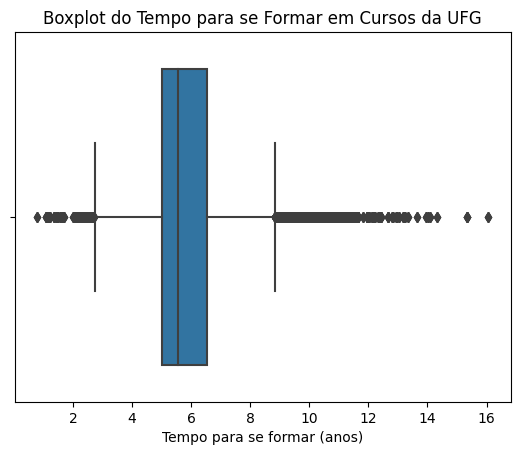

In [14]:
sns.boxplot(x=df_completo['tempo_duracao'])
plt.xlabel('Tempo para se formar (anos)')
plt.title('Boxplot do Tempo para se Formar em Cursos da UFG')
plt.show()

In [15]:
df_completo['ano_conclusao'] = df_completo['conclusao'].dt.year

quantidade_formados_por_ano = df_completo.groupby('ano_conclusao').size()

anos = quantidade_formados_por_ano.index.tolist()
quantidade_formados = quantidade_formados_por_ano.values.tolist()

lista_anos_e_formados = list(zip(anos, quantidade_formados))
print(lista_anos_e_formados)

[(2015, 3), (2019, 2586), (2020, 7695), (2021, 8181), (2022, 8139), (2023, 4797)]


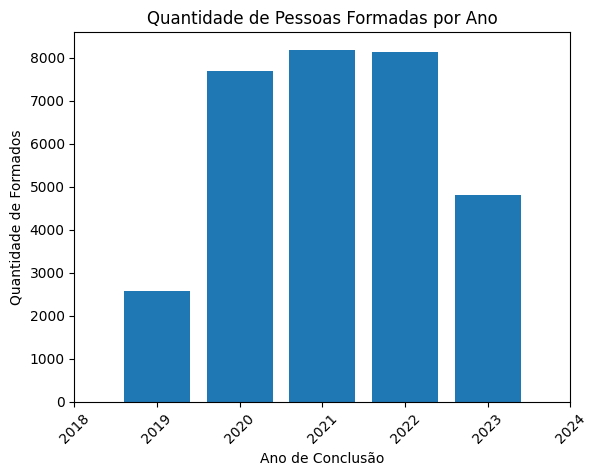

In [16]:
anos, quantidade_formados = zip(*lista_anos_e_formados)

plt.bar(anos, quantidade_formados)
plt.xlabel('Ano de Conclusão')
plt.ylabel('Quantidade de Formados')
plt.title('Quantidade de Pessoas Formadas por Ano')
plt.xlim(2018, 2024)
plt.xticks(rotation=45)
plt.show()


In [17]:
df_completo['ano_entrada'] = df_completo['entrada'].dt.year

quantidade_entrada_por_ano = df_completo.groupby('ano_entrada').size()

anos = quantidade_entrada_por_ano.index.tolist()
quantidade_entrada = quantidade_entrada_por_ano.values.tolist()

lista_anos_e_entrada = list(zip(anos, quantidade_entrada))
print(lista_anos_e_entrada)

[(2004, 6), (2005, 3), (2006, 6), (2008, 24), (2009, 84), (2010, 252), (2011, 480), (2012, 1029), (2013, 2112), (2014, 4089), (2015, 5883), (2016, 6780), (2017, 5856), (2018, 3417), (2019, 1218), (2020, 114), (2021, 36), (2022, 12)]


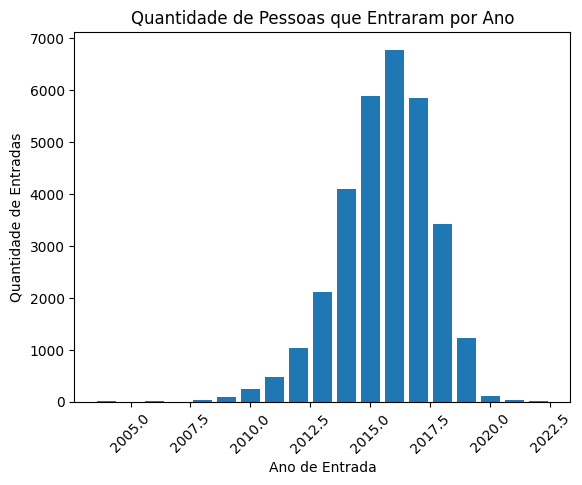

In [18]:
anos, quantidade_entrada = zip(*lista_anos_e_entrada)

plt.bar(anos, quantidade_entrada)
plt.xlabel('Ano de Entrada')
plt.ylabel('Quantidade de Entradas')
plt.title('Quantidade de Pessoas que Entraram por Ano')
plt.xticks(rotation=45)
plt.show()
